<a href="https://colab.research.google.com/github/alexsuakim/CV-Crayfish-Stress-Level-Detection/blob/main/Crayfish_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# should connect to GPU before runing since the training process can be computationally expensive
!nvidia-smi

Sat Aug 12 14:01:19 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#import and install all the necessary libraries and packages

import os
HOME = os.getcwd()
print(HOME)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

from ultralytics import YOLO
from IPython.display import display, Image

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/166.8 GB disk)


In [ ]:
#import custom dataset from roboflow

!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="y1Wk8D8AX4uI4GIe6kCM")
project = rf.workspace("hku-ndiax").project("crayfish-detection-aig0g")
dataset = project.version(1).download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.2 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to Crayfish-Detection-1 in yolov8:: 100%|██████████| 166/166 [00:00<00:00, 3013.42it/s]


In [ ]:
# train the model

%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:01<00:00, 18.4MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Crayfish-Detection-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, k

/content


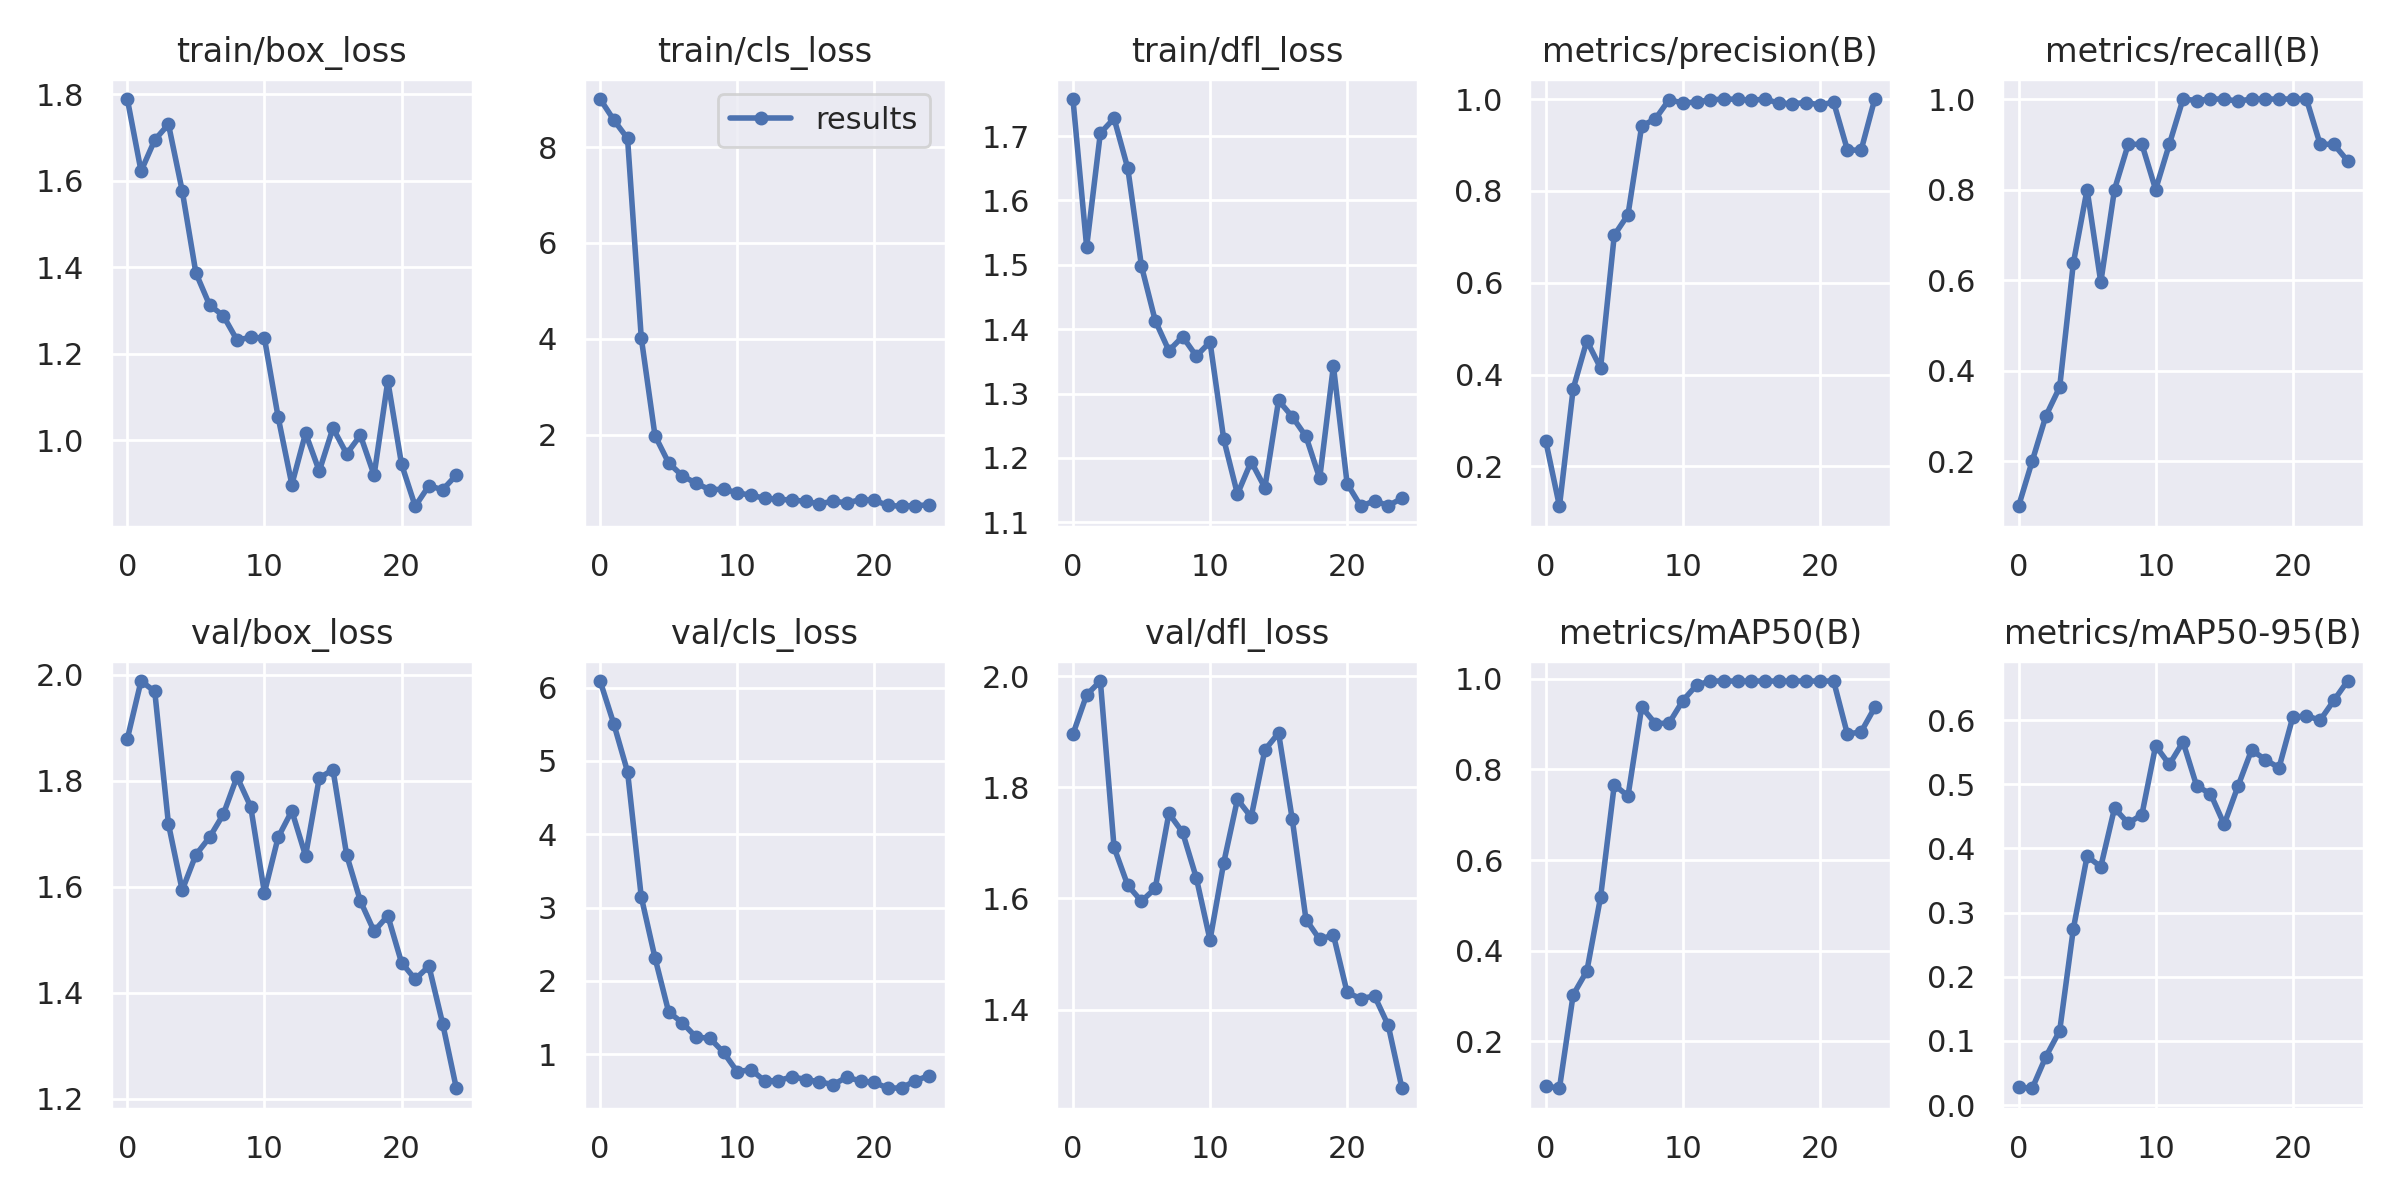

In [ ]:
#visualise the model's accuracy metrics for each epoch

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


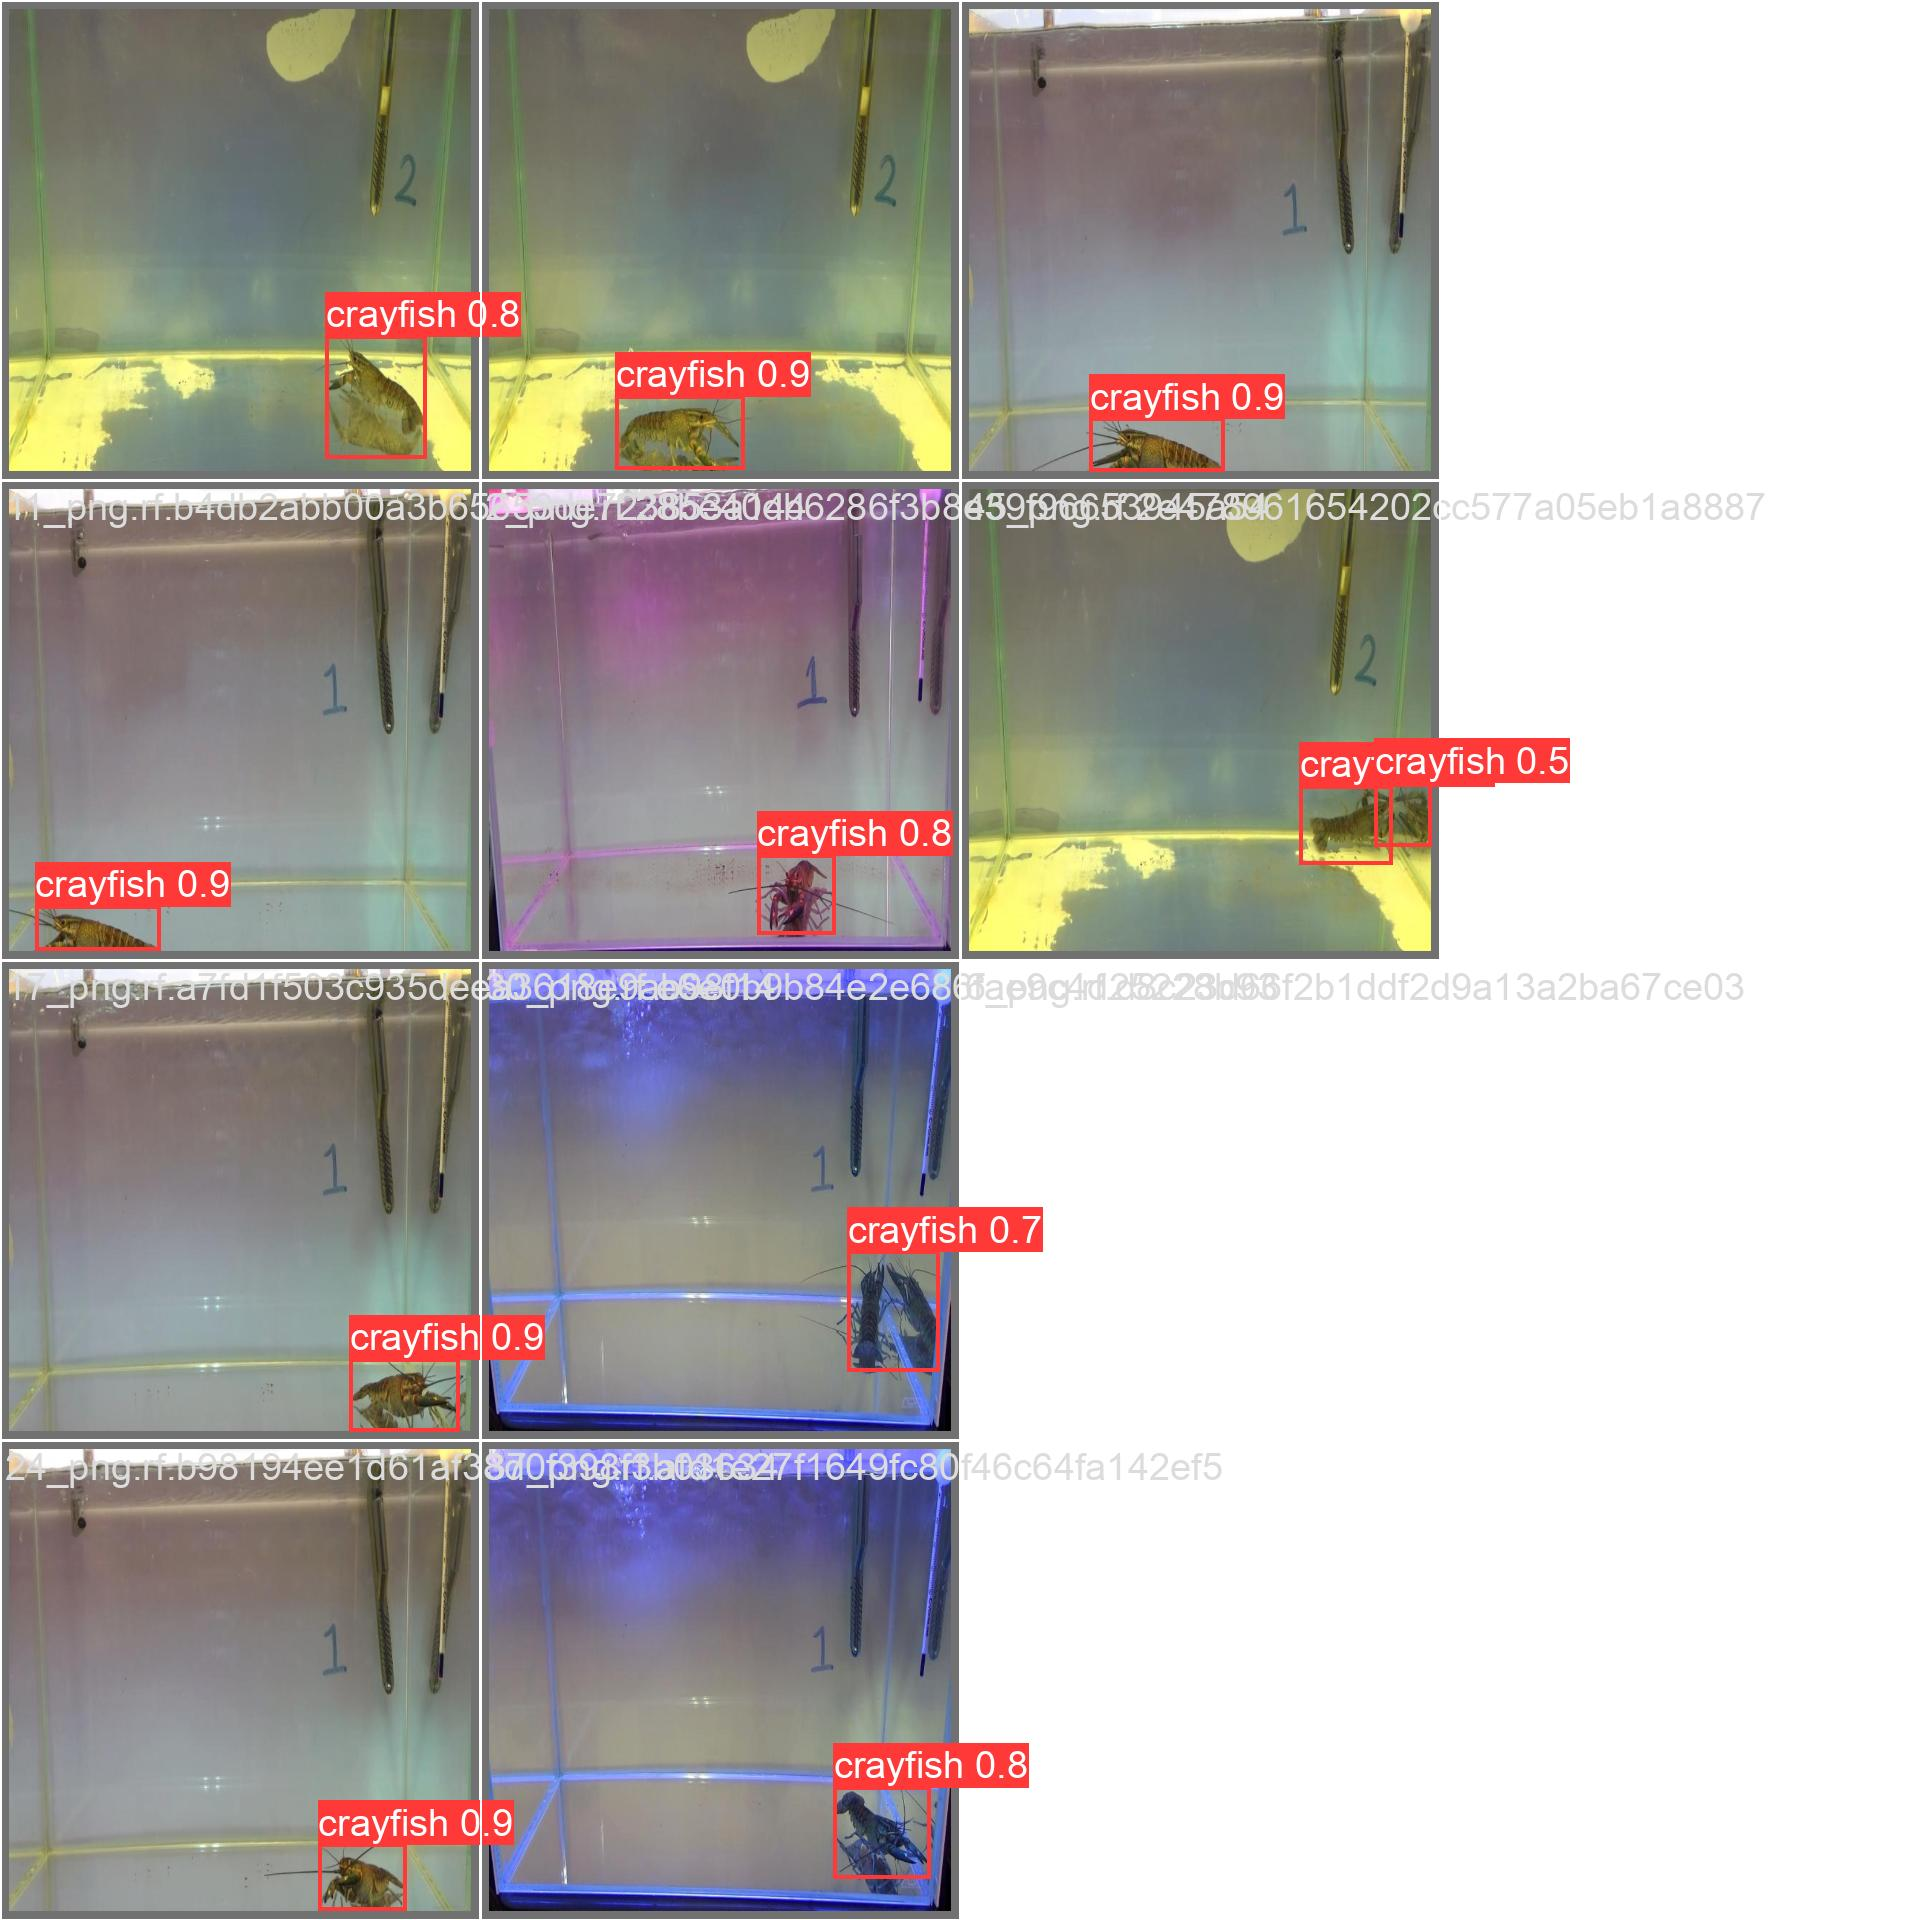

In [ ]:
#show bounding boxes over detected craycish from validation batch

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
#detection results for the validation set

%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-08-12 14:07:21.215289: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-12 14:07:22.266134: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Crayfish-Detection-1/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100% 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.37it/s]
                   all         10         10          1      0.864      0.937       0.67
Speed: 0.4ms pre-process, 

In [ ]:
#detection results for the testing set

%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-08-12 14:07:38.531789: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-12 14:07:39.451708: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/5 /content/datasets/Crayfish-Detection-1/test/images/27_png.rf.569550a0eacebc6124a9a4ff5c9697fa.jpg: 800x800 1 crayfish, 24.6ms
image 2/5 /content/datasets/Crayfish-Detection-1/test/images/29_png.rf.3e76908ab79e63e0134ba4619ab61deb.jpg: 800x800 1 crayfish, 24.7ms
image 3/5 /content/datasets/Crayfish-Detection-1/test/images/36_png.rf.2916cda78e0475a6eb2f7c58d428f494.jpg

In [ ]:
#mount google drive to apply crayfish detection model on custom crayfish videos

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#detect from video and save the detectied video file
#MTS files don't work. They should be converted to mp4 before applying the detection model.
#videos after detection can be found at /runs/detect/predict{number}

%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source="/content/drive/MyDrive/crayfish/crayfish.mp4" save=True

/content
2023-08-12 14:15:37.480781: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-12 14:15:40.266123: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/3290) /content/drive/MyDrive/crayfish/crayfish.mp4: 480x800 1 crayfish, 63.9ms
video 1/1 (2/3290) /content/drive/MyDrive/crayfish/crayfish.mp4: 480x800 1 crayfish, 15.4ms
video 1/1 (3/3290) /content/drive/MyDrive/crayfish/crayfish.mp4: 480x800 1 crayfish, 15.4ms
video 1/1 (4/3290) /content/drive/MyDrive/crayfish/crayfish.mp4: 480x800 1 crayfish, 15.3ms
video 1/1 (

In [ ]:
#calculating the total distance that the crayfish travelled in a video

import math
total_distance = 0
frame = 10
n_frames = 0

#set model as custom detection model
model = YOLO("/content/runs/detect/train/weights/best.pt")

#make predictions
pred = model("/content/drive/MyDrive/crayfish/crayfish.mp4")

#distance calculation
for idx in range(0, len(pred)-10, frame):
    # compare the distance between the previous frame and the following frame
    bbox0 = pred[idx].boxes.xywh
    bbox1 = pred[idx + frame].boxes.xywh
    # print(idx ,bbox0.nelement(), bbox0)

    # check if the crafish is properly detected
    if (bbox0.nelement() != 0 and bbox1.nelement() != 0):
        x_axis = float(bbox1[0][0]) - float(bbox0[0][0])
        y_axis = float(bbox1[0][1]) - float(bbox0[0][1])
        distance = math.sqrt(x_axis**2 + y_axis**2)
        #print(distance)
        total_distance += distance # add distance between two frames to total distance
        n_frames += 1

movement = total_distance / n_frames
print(f'total distance: {total_distance}')
print(f'movement: {movement}')

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


total distance: 1749.3546808201606
movement: 6.181465303251451


In [ ]:
#calculating the total distance that the crayfish travelled in a video

import math
total_distance = 0
frame = 10
n_frames = 0

#set model as custom detection model
model = YOLO("/content/runs/detect/train/weights/best.pt")

#make predictions
pred = model("/content/drive/MyDrive/crayfish videos classification/norm/Blue light high intensity 1.mp4")

#distance calculation
for idx in range(0, len(pred)-10, frame):
    # compare the distance between the previous frame and the following frame
    bbox0 = pred[idx].boxes.xywh
    bbox1 = pred[idx + frame].boxes.xywh
    # print(idx ,bbox0.nelement(), bbox0)

    # check if the crafish is properly detected
    if (bbox0.nelement() != 0 and bbox1.nelement() != 0):
        x_axis = float(bbox1[0][0]) - float(bbox0[0][0])
        y_axis = float(bbox1[0][1]) - float(bbox0[0][1])
        distance = math.sqrt(x_axis**2 + y_axis**2)
        #print(distance)
        total_distance += distance # add distance between two frames to total distance
        n_frames += 1

movement = total_distance / n_frames
print(f'total distance: {total_distance}')
print(f'movement: {movement}')

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


total distance: 23167.23627282692
movement: 16.873442296305114


In [ ]:
#calculating the total distance that the crayfish travelled in a video

def movement(input_path):

    import math
    total_distance = 0
    frame = 10
    n_frames = 0

    #set model as custom detection model
    model = YOLO("/content/runs/detect/train/weights/best.pt")

    #make predictions
    pred = model(input_path)

    #distance calculation
    for idx in range(0, len(pred)-10, frame):
        # compare the distance between the previous frame and the following frame
        bbox0 = pred[idx].boxes.xywh
        bbox1 = pred[idx + frame].boxes.xywh
        #print(idx ,bbox0.nelement(), bbox0)#

        # check if the crafish is properly detected
        if (bbox0.nelement() != 0 and bbox1.nelement() != 0):
            x_axis = float(bbox1[0][0]) - float(bbox0[0][0])
            y_axis = float(bbox1[0][1]) - float(bbox0[0][1])
            distance = math.sqrt(x_axis**2 + y_axis**2)
            #print(distance)#
            total_distance += distance # add distance between two frames to total distance
            n_frames += 1

    movement = total_distance / n_frames
    print(f'total distance: {total_distance}')
    print(f'movement: {movement}')
    print()

    return movement

In [ ]:
import pandas as pd
import os
from statistics import mean, median, variance

path = "/content/drive/MyDrive/crayfish videos classification/norm"

#for file in os.listdir(path):
    #print(file)

#loop for norm directory
norm_mvmt = []
for file_name in os.listdir(path):
    print(file_name)
    file_path = path + "/" + file_name
    crayfish_movement = movement(file_path)
    norm_mvmt.append(crayfish_movement)

norm_stat = mean(norm_mvmt), median(norm_mvmt), variance(norm_mvmt)
print("mean median variance")
print(norm_stat)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Blue light high intensity 1.mp4


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


total distance: 23167.23627282692
movement: 16.873442296305114

Control 1 low intensity .mp4


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


total distance: 16690.98448554338
movement: 11.93065367086732

Control 1 high intensity.mp4


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


total distance: 23358.269980689518
movement: 15.634718862576651

Yellow light high intensity 1.mp4


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


total distance: 18009.27399824398
movement: 11.291080876641995

Red light low intensity 1.mp4


Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


total distance: 13600.525200470162
movement: 8.679339630166025

Yellow light high intensity 2.mp4


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


total distance: 9682.891957799018
movement: 7.274900043425258

Red light low intensity 2(9_46) .mp4


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


total distance: 13536.177094709086
movement: 9.387085363875928

mean median variance
(11.581602963408328, 11.291080876641995, 12.737380247948686)


In [ ]:
#stress
path = "/content/drive/MyDrive/crayfish videos classification/stress"

#loop for stress directory
stress_mvmt = []
for file_name in os.listdir(path):
    print(file_name)
    file_path = path + "/" + file_name
    crayfish_movement = movement(file_path)
    stress_mvmt.append(crayfish_movement)

stress_stat = mean(stress_mvmt), median(stress_mvmt), variance(stress_mvmt)
print("mean median variance")
print(stress_stat)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Blue light low intensity 1.mp4


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


total distance: 6633.941144347954
movement: 4.422627429565303

Red light high intensity 1.mp4


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


total distance: 17492.840724555732
movement: 9.659216302902117

Yellow light low intensity 1.mp4


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


total distance: 9554.678865074182
movement: 5.840268254935319

Yellow light low intensity 2.mp4


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


total distance: 6489.84300114787
movement: 3.9766194859974697

mean median variance
(5.974682868350052, 5.131447842250311, 6.664995761197009)


In [ ]:
#compare movement value to the cutoff value to determine the stress level
def predict(movement_value):
    cutoff_value = 7
    #norm
    if (movement_value > cutoff_value):
        return 0
    #stressed
    else:
        return 1

#apply to movement results
norm_pred = []
for i in norm_mvmt:
  norm_pred.append(predict(i))

stress_pred = []
for i in stress_mvmt:
  stress_pred.append(predict(i))

#accuracy
norm = 0
for i in norm_pred:
    if (i == 0):
        norm += 1

stress = 0
for i in stress_pred:
    if (i == 1):
        stress += 1

accuracy = (norm + stress) / (len(norm_pred) + len(stress_pred))
print(f'accuracy: {accuracy}')

accuracy: 0.9090909090909091
